In [1]:
from datatree import open_datatree

In [2]:
dt = open_datatree("/Users/akerney/Downloads/VJ129.A2023204.2212.002.2023219210129.nc")
dt

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes: (12/55)
│       PercentOceanInSwath:               58.8%
│       SeaIceCover:                       0.0%
│       CloudCoverOcean:                   92.1%
│       ClearViewOcean:                    7.9%
│       AlgorithmVersion:                  NPP_PR29 1.0.0
│       StartTime:                         2023-07-23 22:12:00.000
│       ...                                ...
│       ProcessingCenter:                  LandSIPS
│       AlgorithmType:                     SCI
│       DayNightFlag:                      Day
│       license:                           http://science.nasa.gov/earth-science/...
│       PGEVersion:                        2.0.5
│       creator_name:                      VIIRS Land SIPS Processing Group
├── DataTree('GeolocationData')
│       Dimensions:    (number_of_lines: 6464, number_of_pixels: 6400)
│       Dimensions without coordinates: number_of_lines, number_of_pixels
│       Data variables:
│           latitude   (number_of_lines, number_of_pixels) float32 ...
│           longitude  (number_of_lines, number_of_pixels) float32 ...
└── DataTree('SeaIceCoverData')
        Dimensions:               (number_of_lines: 6464, number_of_pixels: 6400)
        Dimensions without coordinates: number_of_lines, number_of_pixels
        Data variables:
            Algorithm_QA_Flags    (number_of_lines, number_of_pixels) uint8 ...
            SeaIceCover           (number_of_lines, number_of_pixels) float32 ...
            SeaIceCover_Basic_QA  (number_of_lines, number_of_pixels) float32 ...
        Attributes:
            I01_Noisy_Detectors_Count:         0
            I01_detector_quality_flag_values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
            I02_Noisy_Detectors_Count:         0
            I02_detector_quality_flag_values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
            I03_Noisy_Detectors_Count:         1
            I03_detector_quality_flag_values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
            detector_quality_flag_masks:       [  1   2   4   8  16  32  64 128]
            detector_quality_flag_meanings:    Noisy Dead

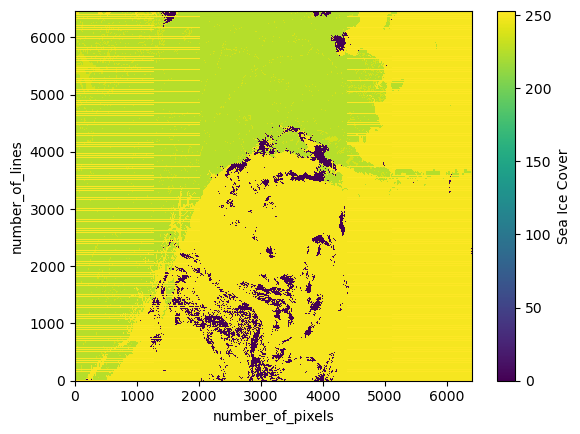

In [3]:
dt['SeaIceCoverData']['SeaIceCover'].plot()

In [4]:
import earthaccess

/usr/local/miniconda3/envs/sea-ice-oscillations/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
No .netrc found in /Users/akerney


Enter your Earthdata Login username:  akerney
Enter your Earthdata password:  ········


You're now authenticated with NASA Earthdata Login
Using token with expiration date: 10/07/2023
Using user provided credentials for EDL


In [6]:
earthaccess.search_data?

Signature: earthaccess.search_data(count: int = -1, **kwargs: Any) -> List[earthaccess.results.DataGranule]
Docstring:
Search dataset granules using NASA's CMR.

[https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html)

Parameters:

    count (Integer): Number of records to get, -1 = all
    kwargs (Dict): arguments to CMR:

        * **short_name**: dataset short name e.g. ATL08

        * **version**: dataset version

        * **doi**: DOI for a dataset

        * **daac**: e.g. NSIDC or PODAAC

        * **provider**: particular to each DAAC, e.g. POCLOUD, LPDAAC etc.

        * **temporal**: ("yyyy-mm-dd", "yyyy-mm-dd")

        * **bounding_box**: (lower_left_lon, lower_left_lat ,
                           upper_right_lon, upper_right_lat)
Returns:
    Granules: a list of DataGranules that can be used to access
      the granule files by using `download()` or `open()`.
Examples:
    ```python
    datasets 

In [7]:
results = earthaccess.search_data(
    short_name="VNP29", 
    cloud_hosted=True, 
    bounding_box=(-168.29297, 53.296, -154.95117, 61.01222),
    temporal=("2023-01", "2023-09"),
    count=10
)
results

Granules found: 2646


[Collection: {'EntryTitle': 'VIIRS/NPP Sea Ice Cover 6-Min L2 Swath 375 m V001'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -164.415618896484, 'Latitude': 56.5412826538086}, {'Longitude': 149.948318481445, 'Latitude': 49.6469993591309}, {'Longitude': 163.251846313477, 'Latitude': 30.8478927612305}, {'Longitude': -164.155487060547, 'Latitude': 35.7799034118652}, {'Longitude': -164.415618896484, 'Latitude': 56.5412826538086}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-01-01T01:06:00.000Z', 'EndingDateTime': '2023-01-01T01:12:00.000Z'}}
 Size(MB): 237.366
 Data: ['https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc'],
 Collection: {'EntryTitle': 'VIIRS/NPP Sea Ice Cover 6-Min L2 Swath 375m V002'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 163.255859375, 'Latitude': 30.85

In [8]:
data_links = [granule.data_links(access="direct") for granule in results]
data_links

[[], [], [], [], [], [], [], [], [], []]

In [9]:
g = results[0]
g

Collection: {'EntryTitle': 'VIIRS/NPP Sea Ice Cover 6-Min L2 Swath 375 m V001'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -164.415618896484, 'Latitude': 56.5412826538086}, {'Longitude': 149.948318481445, 'Latitude': 49.6469993591309}, {'Longitude': 163.251846313477, 'Latitude': 30.8478927612305}, {'Longitude': -164.155487060547, 'Latitude': 35.7799034118652}, {'Longitude': -164.415618896484, 'Latitude': 56.5412826538086}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-01-01T01:06:00.000Z', 'EndingDateTime': '2023-01-01T01:12:00.000Z'}}
Size(MB): 237.366
Data: ['https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc']

In [10]:
g.data_links()[0]

'https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc'

In [11]:
data_links = [granule.data_links()[0] for granule in results]
data_links

['https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc',
 'https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.0106.002.2023093134553.nc',
 'https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0112.001.2023001111507.nc',
 'https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.0112.002.2023093134449.nc',
 'https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.2130.001.2023002074858.nc',
 'https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.2130.002.2023093133635.nc',
 'https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.2306.001.2023002082140.nc',
 'https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.2306.002.2023093133518.nc',
 'https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.2312.001.2023002083454.nc',
 'https://n5eil01u.ecs.nsidc.org/DP7/

In [12]:
import xarray as xr

In [13]:
import fsspec

In [14]:
ds = xr.open_mfdataset([fsspec.open(link) for link in data_links])
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [15]:
files = earthaccess.open(results)
files

 Opening 10 granules, approx size: 2.33 GB


QUEUEING TASKS | : 10it [00:00, 828.85it/s]
PROCESSING TASKS | : 100%|████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.80it/s]
COLLECTING RESULTS | : 100%|███████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 98227.26it/s]


[<File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.0106.002.2023093134553.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0112.001.2023001111507.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.0112.002.2023093134449.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.2130.001.2023002074858.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP7/VIIRS/VNP29.002/2023.01.01/VNP29.A2023001.2130.002.2023093133635.nc>,
 <File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.2306.001.2023002082140.nc>,
 <File-like object H

In [16]:
ds = xr.open_mfdataset(files)
ds

KeyboardInterrupt: 

In [17]:
single_ds = xr.open_dataset(files[0])
single_ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/52)
    AlgorithmType:                     OPS
    AlgorithmVersion:                  NPP_PR29 1.0.0
    CloudCover:                        84.2%
    Conventions:                       CF-1.6
    DayNightFlag:                      Day
    EastBoundingCoord:                 -164.15549
    ...                                ...
    project:                           VIIRS Land SIPS Sea Ice Cover Project
    publisher_email:                   modis-ops@lists.nasa.gov
    publisher_name:                    LAADS
    publisher_url:                     http://ladsweb.nascom.nasa.gov
    stdname_vocabulary:                NetCDF Climate and Forecast (CF) Metad...
    title:                             VIIRS Sea Ice Cover

In [18]:
from datatree import open_datatree

In [19]:
dt = open_datatree(files[0])
dt

OSError: [Errno -36] NetCDF: Invalid argument: '<File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc>'

In [20]:
f = files[0]
f

<File-like object HTTPFileSystem, https://n5eil01u.ecs.nsidc.org/DP8/VIIRS/VNP29.001/2023.01.01/VNP29.A2023001.0106.001.2023001110613.nc>

In [21]:
dir(f)

['DEFAULT_BLOCK_SIZE',
 '__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_details',
 '_fetch_range',
 '_initiate_upload',
 '_upload_chunk',
 'close',
 'closed',
 'commit',
 'details',
 'discard',
 'f',
 'fileno',
 'flush',
 'full_name',
 'granule',
 'info',
 'isatty',
 'loc',
 'read',
 'readable',
 'readinto',
 'readinto1',
 'readline',
 'readlines',
 'readuntil',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

In [22]:
ds = xr.open_dataset(files[0], group="SeaIceCover_Data")
ds

<xarray.Dataset>
Dimensions:               (number_of_lines: 6464, number_of_pixels: 6400)
Dimensions without coordinates: number_of_lines, number_of_pixels
Data variables:
    Algorithm_QA_Flags    (number_of_lines, number_of_pixels) float32 ...
    SeaIceCover_Basic_QA  (number_of_lines, number_of_pixels) float32 ...
    SeaIceCover_Map       (number_of_lines, number_of_pixels) float32 ...

In [23]:
ds["SeaIceCover_Map"]

<xarray.DataArray 'SeaIceCover_Map' (number_of_lines: 6464,
                                     number_of_pixels: 6400)>
[41369600 values with dtype=float32]
Dimensions without coordinates: number_of_lines, number_of_pixels
Attributes:
    coordinates:    latitude longitude
    long_name:      Sea Ice Cover map with masks
    mask_meanings:  200-missing, 201-no_decision, 211-night, 225-land, 237-in...
    mask_values:    [200 201 211 225 237 250 252 253 254]
    valid_range:    [  0 100]

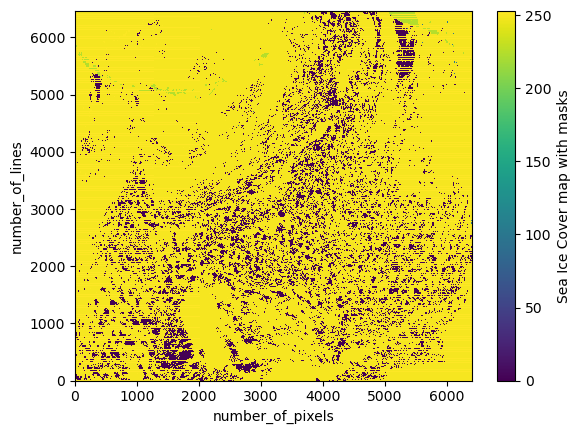

In [24]:
ds["SeaIceCover_Map"].plot()